## WORKSHOP -1 
## Adding Sunglasses to Your Passport Photo Using OpenCV 
## Name: KARUNIYA M
## Reg. No:212223240068


In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

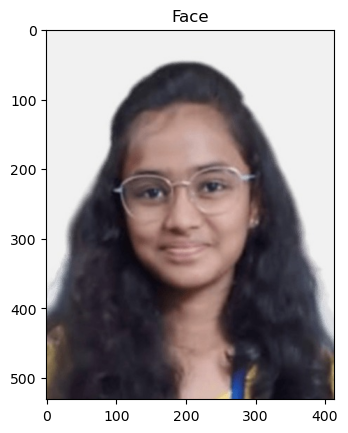

In [3]:
# Load the Face Image
faceImage = cv2.imread('ka.JPG')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")


In [4]:
faceImage.shape

(531, 413, 3)

In [5]:
#resized_faceImage.shape
faceImage.shape

(531, 413, 3)

Text(0.5, 1.0, 'glassPNG')

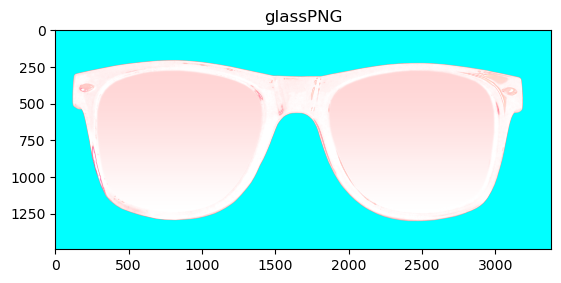

In [6]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('sunglass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [7]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(50, 190, 4)


In [8]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

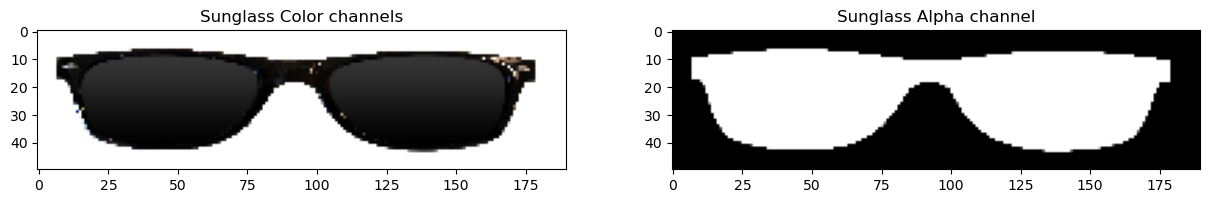

In [9]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

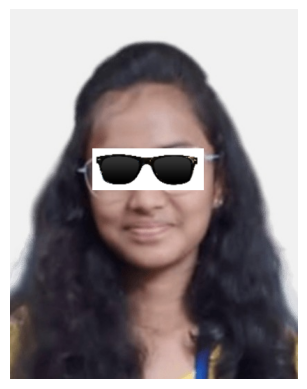

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

faceWithGlassesNaive = faceImage.copy()

# Target position
x, y = 118, 200

# Desired size
target_w, target_h = 160, 60

# Resize glasses
glassResized = cv2.resize(glassBGR, (target_w, target_h))

# Get image dimensions
h, w = faceWithGlassesNaive.shape[:2]

# Clip if overlay goes out of bounds
end_x = min(x + target_w, w)
end_y = min(y + target_h, h)

# Adjust overlay size to match clipped ROI
glassResized = glassResized[:end_y - y, :end_x - x]

# Overlay
faceWithGlassesNaive[y:end_y, x:end_x] = glassResized

plt.imshow(faceWithGlassesNaive[..., ::-1])
plt.axis("off")
plt.show()


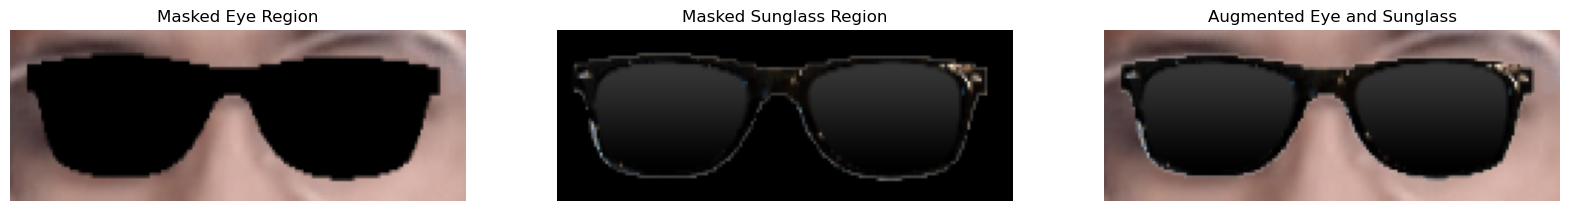

In [46]:
# Assuming glassPNG has alpha channel
glassAlpha = glassPNG[..., 3] / 255.0
glassBGR = glassPNG[..., :3]

# Resize
glassBGR = cv2.resize(glassBGR, (target_w, target_h))
glassAlpha = cv2.resize(glassAlpha, (target_w, target_h))

# Extract eye region from face
eyeRoi = faceImage[y:y+target_h, x:x+target_w].copy()

# Masked eye and glasses
maskedEye = eyeRoi * (1 - glassAlpha[..., np.newaxis])
maskedGlass = glassBGR * glassAlpha[..., np.newaxis]
eyeRoiFinal = maskedEye + maskedGlass

# Convert to uint8 for display
maskedEye_disp = np.clip(maskedEye.astype(np.uint8), 0, 255)
maskedGlass_disp = np.clip(maskedGlass.astype(np.uint8), 0, 255)
eyeRoiFinal_disp = np.clip(eyeRoiFinal.astype(np.uint8), 0, 255)

# Display 3-panel intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131)
plt.imshow(maskedEye_disp[..., ::-1])
plt.title("Masked Eye Region")
plt.axis("off")

plt.subplot(132)
plt.imshow(maskedGlass_disp[..., ::-1])
plt.title("Masked Sunglass Region")
plt.axis("off")

plt.subplot(133)
plt.imshow(eyeRoiFinal_disp[..., ::-1])
plt.title("Augmented Eye and Sunglass")
plt.axis("off")
plt.show()


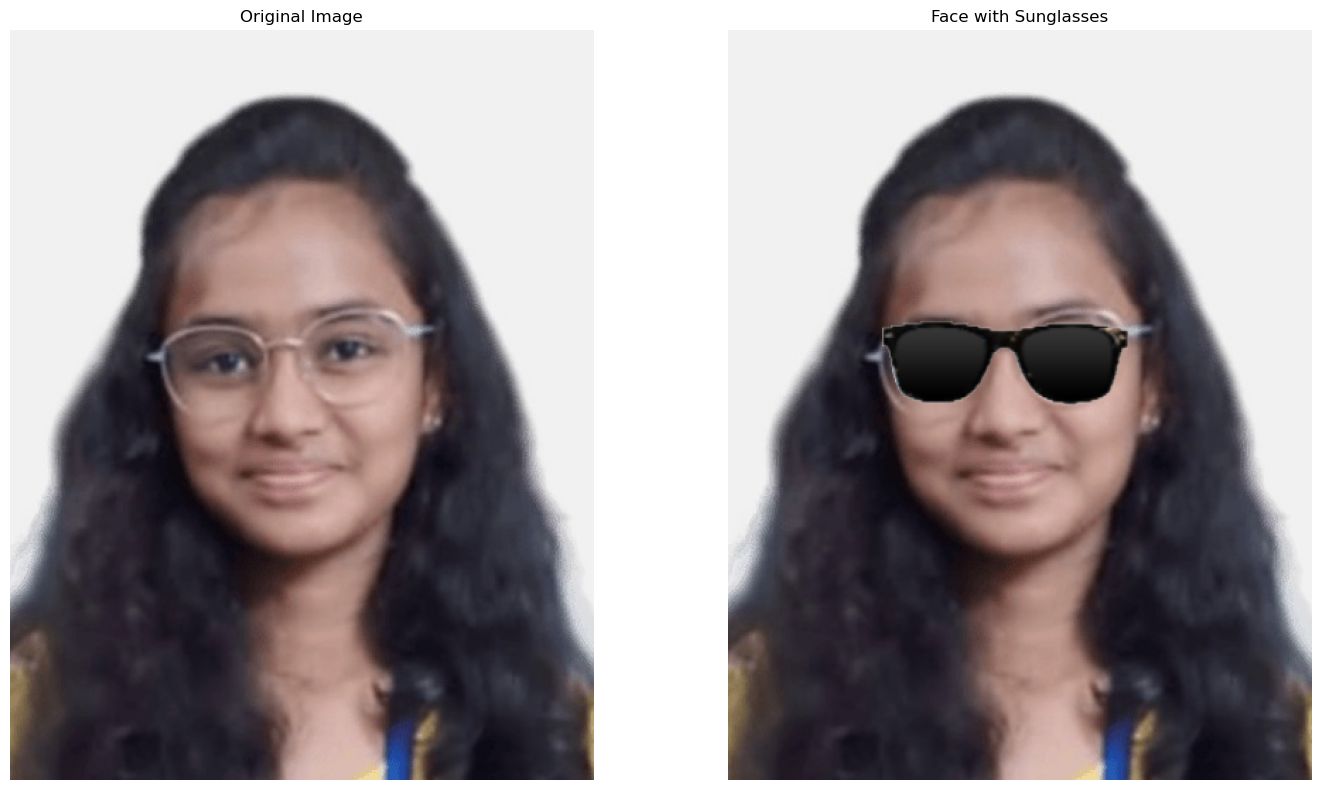

In [115]:
# Create a copy of the original face
faceWithGlasses = faceImage.copy()

# Apply alpha blending of sunglasses (example)
x, y = 102, 195
target_w, target_h = 192, 80

# Image dimensions
h, w = faceWithGlasses.shape[:2]

# Clip so sunglasses don't exceed boundaries
end_x = min(x + target_w, w)
end_y = min(y + target_h, h)

# Adjust width/height based on clipping
overlay_w = end_x - x
overlay_h = end_y - y

# Resize glasses to fit adjusted size
glassBGR_resized = cv2.resize(glassBGR, (overlay_w, overlay_h))
glassAlpha_resized = cv2.resize(glassPNG[..., 3] / 255.0, (overlay_w, overlay_h))

# Extract ROI of face
roi = faceWithGlasses[y:end_y, x:end_x]

# Alpha blending
for c in range(3):
    roi[..., c] = roi[..., c] * (1 - glassAlpha_resized) + glassBGR_resized[..., c] * glassAlpha_resized

# Put ROI back into image
faceWithGlasses[y:end_y, x:end_x] = roi

# Plot
plt.figure(figsize=[15, 8])
plt.subplot(1, 2, 1)
plt.imshow(faceImage[..., ::-1])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(faceWithGlasses[..., ::-1])
plt.title("Face with Sunglasses")
plt.axis("off")

plt.tight_layout()
plt.show()
